# Dimensionality Reduction by Extracting Principal Components

[Wine](https://archive.ics.uci.edu/ml/machine-learning-databases/wine/)

In [1]:
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('wine.csv')

In [5]:
df.shape

(178, 14)

In [6]:
df.head()

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [7]:
X = df.iloc[:,1:]

In [9]:
y =df['class']

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
from sklearn.preprocessing import StandardScaler
sc =StandardScaler()

In [41]:
sc.fit(X_train)
X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_train)

In [42]:
from sklearn.decomposition import PCA

In [43]:
pca = PCA(n_components= 2)
pca.fit(X_train_sc)

PCA(n_components=2)

In [44]:
pca.explained_variance_ratio_

array([0.35900066, 0.18691934])

In [45]:
print(np.round(pca.explained_variance_ratio_,3))

[0.359 0.187]


In [46]:
pd.DataFrame(np.round(pca.components_,3),columns =X.columns).T

,0,1
Alcohol,0.128,-0.493
Malic acid,-0.256,-0.190
Ash,-0.022,-0.317
Alcalinity of ash,-0.244,0.035
Magnesium,0.148,-0.262
Total phenols,0.385,-0.096
Flavanoids,0.420,-0.015
Nonflavanoid phenols,-0.299,-0.076
Proanthocyanins,0.308,-0.074
Color intensity,-0.119,-0.534


  ### In case we do not know the number of components to use what do we do here is what we do

In [47]:
pca =PCA(n_components=None)
pca.fit(X_train_sc)

PCA()

In [48]:
print(np.round(pca.explained_variance_ratio_,3))

[0.359 0.187 0.116 0.074 0.067 0.049 0.042 0.027 0.023 0.019 0.017 0.013
 0.008]


In [49]:
np.cumsum(pca.explained_variance_ratio_)

array([0.35900066, 0.54592   , 0.66198557, 0.73570273, 0.80224132,
       0.85078714, 0.89273756, 0.91957678, 0.94305138, 0.96194872,
       0.97910815, 0.99173743, 1.        ])

 so with 5 components we are able to explain 80% of the data

Text(0, 0.5, 'cummulative explained variance')

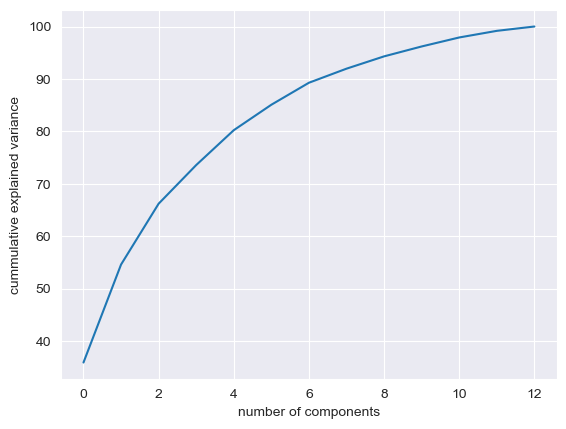

In [50]:
sns.set_style('darkgrid')
plt.plot(np.cumsum(pca.explained_variance_ratio_)*100)
plt.xlabel('number of components')
plt.ylabel('cummulative explained variance')

# Good Job